# Домашняя работа №1

**Срок сдачи:** 9 октября 2017, 23:59 <br\>

При отправлении ДЗ в Dropbox указывайте фамилию в названии файла: <br\>
** IDA<Номер группы>HW1<Фамилия>.ipynb ** - например ** IDA1HW1Panov.ipynb **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

In [13]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/grafft/hse-tasks/master/minor-aml-17/hw1/titanium.csv',
                 skipinitialspace=True )
df2 = df
df[:5]

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [14]:
#предобработка
df.x = (df.x - df.x.mean()) / df.x.std()
df.y = (df.y - df.y.mean()) / df.y.std()

df[:5]


,x,y
0,-1.679650,-0.428220
1,-1.609665,-0.486883
2,-1.539679,-0.444219
3,-1.469694,-0.414887
4,-1.399708,-0.406888


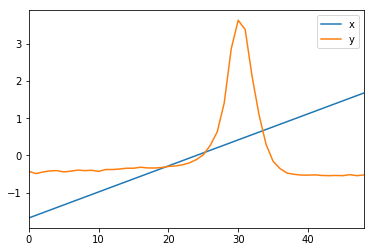

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot() #по горизонтальной оси отложено кол-во эл-ов в выборке , по вертикальной - значения для x (признака) и y(ответов)



(<matplotlib.text.Text at 0x218b6d49b38>,
 <matplotlib.text.Text at 0x218b7e656d8>)

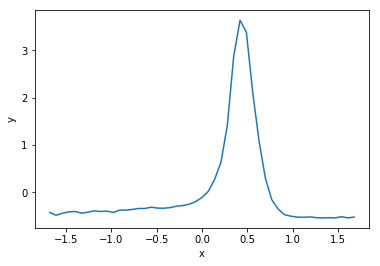

In [16]:
plt.plot(df.x,df.y) #верт ось - y , гор ось -  x
plt.xlabel('x'), plt.ylabel('y')

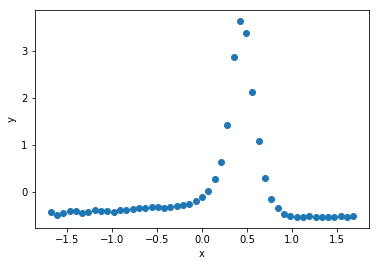

In [17]:
plt.scatter(df.x,df.y)
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [18]:
import numpy as np

x = np.array(df.x).reshape(-1 ,1) #транспонирование матрицы для корректной подачи в ф-ию fit
y = np.array(df.y)                  #(было - 'массив' из n значений , стало - n матриц содер одно значение)

from sklearn.model_selection import train_test_split as TTS

Xtrn, Xtest, Ytrn, Ytest = TTS(x, y, test_size=0.4) #разбиение на тест выборку и обучающую 
#print(Xtrn, Ytrn)

In [19]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error as mae

#функции для расчета ср. абсолютной ошибки для каждого ядра 
def mae_(svm_): 
    svm_.fit(Xtrn, Ytrn)
    res = svm_.predict(Xtest)
    return mae(res,Ytest)
  
def lin_mae(c): 
    lin_swm = svm.SVR(C = c, epsilon=0.01, kernel='linear') 
    return mae_(lin_swm)

def poly_mae(c): 
    poly_swm = svm.SVR(C = c, epsilon=0.01, kernel='poly', degree = 3, gamma = 6, coef0 = 1)
    return mae_(poly_swm)

def rbf_mae(c): 
    rbf_swm = svm.SVR(C = c, epsilon=0.01, kernel='rbf', gamma = 6, coef0 = 1)   
    return mae_(rbf_swm)


- Наилучшее С будет определятся по метрике MAE (лучшее значение С при минимальном MAE)
- Обучаться модели будут на тестовой выборке, график для наилучшего С строиться по всем данным (график модель-данные)

## Линейное ядро

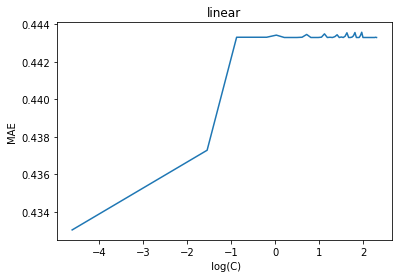

In [20]:
import matplotlib.pyplot as plt

C_means = np.linspace(0.01, 10, num = 50) #50 значений параметра С от 0.1 до 10 с одинаковым шагом

mae_dict = {lin_mae(c):c  for c in  C_means}
plt.plot(np.log(list(mae_dict.values())),list(mae_dict.keys())) #строим график зависимости параметра С от МАЕ
plt.title('linear')
plt.xlabel(' log(C)')
plt.ylabel('MAE')
plt.show()

In [21]:
def min_mae(mae_dict):
    c = mae_dict[min(mae_dict)]
    print('Минимальная ошибка: ',min(mae_dict), ' при С = ', c)
    return c
c= min_mae(mae_dict)

Минимальная ошибка:  0.433027601305  при С =  0.01


Недообучение при С--> +inf (в данном случае примерно при С > 1, как только ошибка остается примерно на одном и том же месте)

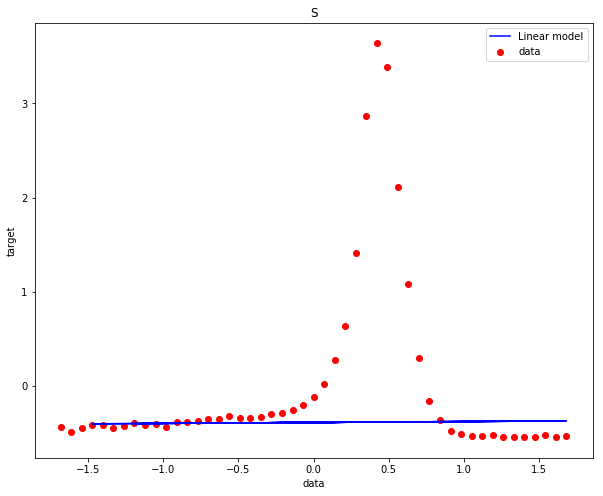

In [22]:
#строим график модель-данные для наилучшего по метрике MAE С
lin_svm = svm.SVR(C = c, epsilon=0.01, kernel='linear') 
lin_svm.fit(Xtrn, Ytrn)
res = lin_svm.predict(Xtest)

plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, color='red', label='data')
plt.plot(Xtest, res, color='blue', label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('S')
plt.legend()
plt.show()

## Полиноминальное ядро 

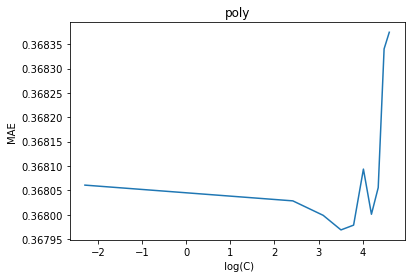

In [29]:
C_means = np.linspace(0.1, 100, num = 10) #ядро с самым долгим обучением, поэтому 10 значений и небольшой разброс
mae_dict = {poly_mae(c):c  for c in  C_means}
plt.plot(np.log(list(mae_dict.values())),list(mae_dict.keys())) #строим график зависимости ппараметра С от МАЕ
plt.title('poly')
plt.xlabel(' log(C)')
plt.ylabel('MAE')
plt.show()

In [24]:
c = min_mae(mae_dict)

Минимальная ошибка:  0.367968798347  при С =  33.4


Недообучение при С--> +inf (в данном случае при С > 40, как только ошибка резко возрастает)


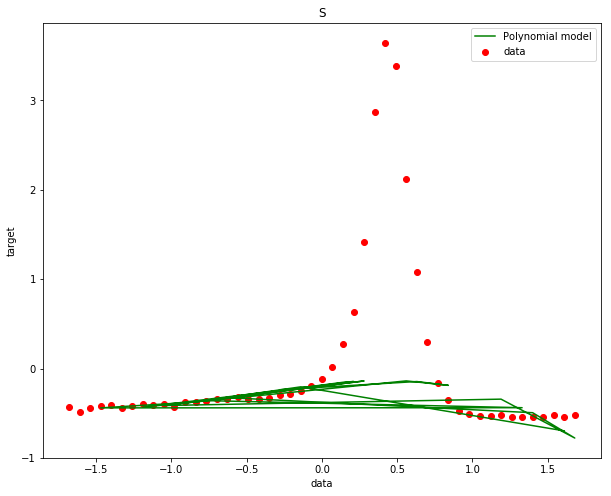

In [30]:
#строим график модель-данные для наилучшего по метрике MAE С
poly_svm = svm.SVR(C = c, epsilon=0.01, kernel='poly', degree = 3, gamma = 6, coef0 = 1)
poly_svm.fit(Xtrn, Ytrn)
res = poly_svm.predict(Xtest)

plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, color='red', label='data')
plt.plot(Xtest, res, color='green', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('S')
plt.legend()
plt.show()


## RBG ядро

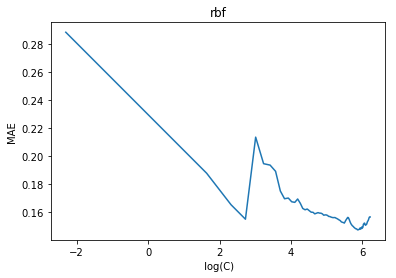

In [26]:
C_means = np.linspace(0.1, 500, num = 100) #показывает наилучший результат при более большом С, в отличии лин. и полином. ядер

mae_dict = {rbf_mae(c):c  for c in  C_means}
plt.plot(np.log(list(mae_dict.values())),list(mae_dict.keys())) #строим график зависимости ппараметра С от МАЕ
plt.title('rbf')
plt.xlabel(' log(C)')
plt.ylabel('MAE')
plt.show()


In [27]:
min_mae(mae_dict)

Минимальная ошибка:  0.147532090795  при С =  353.564646465


353.5646464646465

Недообучение при С --> 0 , там где ошибка резко возрастает

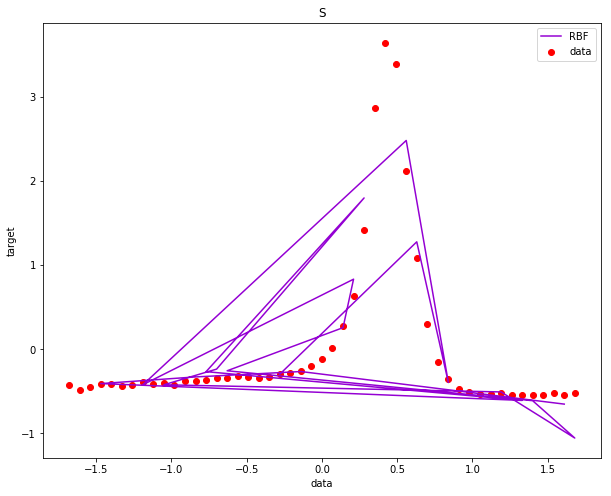

In [28]:
#строим график модель-данные для наилучшего по метрике MAE С
rbf_svm = svm.SVR(C = 25000, epsilon=0.01, kernel='rbf', gamma = 6, coef0 = 1)   
rbf_svm.fit(Xtrn, Ytrn)
res = rbf_svm.predict(Xtest)

plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, color='red', label='data')
plt.plot(Xtest, res, color='darkviolet', label='RBF')
plt.xlabel('data')
plt.ylabel('target')
plt.title('S')
plt.legend()
plt.show()

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [1]:
import re
import pandas as pd
punct = '[*.,!«»1234567890?&@"$\[\]\(\):;%#&\'—-]'
def read_prep(dir_):
    txt = open(dir_, 'r').read()
    txt = re.sub(punct, '', txt.lower()) # удаляем пунктуацию, приводим в нижний регистр    

    words = txt.strip().split() # делим по пробелам
    return words 
    
wap_es = read_prep('war_and_peace_es.txt')
wap_en = read_prep('war_and_peace_en.txt')

In [2]:
df = pd.DataFrame({ 'word' : wap_es, 'label' : 0})
df2 = pd.DataFrame({ 'word' : wap_en, 'label' : 1})

df = df.append(df2)
df.head()


,label,word
0,0,guerra
1,0,pace
2,0,lev
3,0,nicoevic
4,0,tolstj


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

In [11]:
RND_SEED = 43
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split as TTS
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt



In [42]:
Xtrn, Xtest, Ytrn, Ytest = TTS(df.word, df.label, test_size=0.2, random_state=RND_SEED) #разбиение на тест выборку и обучающую 

Наилучшее качество по метрике accuracy для  2 -грамм показала модель с параметром С =  12.0 
Значение метрики accuracy:  0.911003945638 
Наихудшее значение метрики:  0.876370013152


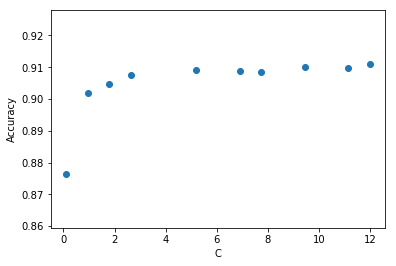

Наилучшее качество по метрике accuracy для  3 -грамм показала модель с параметром С =  2.65 
Значение метрики accuracy:  0.941253836037 
Наихудшее значение метрики:  0.916703200351


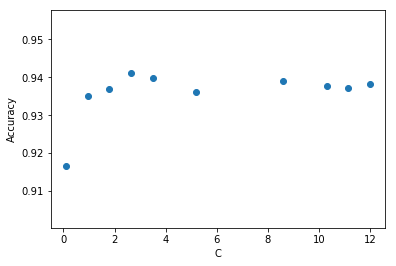

Наилучшее качество по метрике accuracy для  4 -грамм показала модель с параметром С =  0.95 
Значение метрики accuracy:  0.827707145989 
Наихудшее значение метрики:  0.796142042964


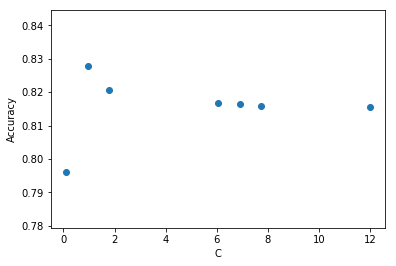

Наилучшее качество по метрике accuracy для  5 -грамм показала модель с параметром С =  0.95 
Значение метрики accuracy:  0.738711091626 
Наихудшее значение метрики:  0.672512056116


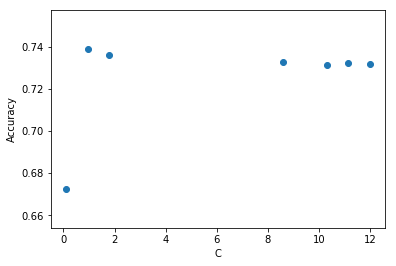

In [43]:
range_ = [2,3,4,5] #ранг n-граммы
C_means = np.linspace(0.1, 12, num =15) #значени для параметра С (величина штрафа)



for r in range_:
    cv= CV(ngram_range=(r,r), analyzer='char')
    acc_dict = {} #словарь для хранения меры accuracy и параметра С
    for c in C_means:
        pipl = Pipeline([('vect', cv), ('svc',svm.SVC(C = c, kernel='linear' ,random_state = RND_SEED))])#Создаем Pipline для
                                                                    #конкретных значений п - грамм (параметр п) и значения С
                                                                        
        txt_clf = pipl.fit(Xtrn, Ytrn)
        res = txt_clf.predict(Xtest)
        acc_dict[accuracy_score(res,Ytest)] = c 
        
    print('Наилучшее качество по метрике accuracy для ', r, '-грамм показала модель с параметром С = ', acc_dict[max(acc_dict)], 
                                             '\nЗначение метрики accuracy: ', max(acc_dict),
                                             '\nНаихудшее значение метрики: ', min(acc_dict))

    plt.scatter(list(acc_dict.values()), list(acc_dict.keys()))
    
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.show()  
         


### Вывод:
- Худший результат (accuracy = 0.67) показала модель на минимальном параметре С = 0.1, при максимальном значении n для n-грамм (n = 5)
- Лучший результат (accuracy = 0.94) был показан моделью для среднего значения параметра n для n -грамм (n = 3 и при С = 2.6)

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

In [128]:
RND_SEED = 46
df_=df.sample(1000,random_state=RND_SEED)#перемешивает все  строчки , оставляя в DataFrame только 1000 случ строчек
df_=df_.reset_index(drop=True)#сбрасываем индексы (т.е. заменяем перемешанные индексы на порядковые - от 0 и т.д., соответственно)


index = [i for i in range(df_.shape[0])] #list из индексов от 0 до 1500
df_.head()

,label,word
0,1,not
1,0,non
2,1,sat
3,0,magnanimit
4,1,kitchen


In [129]:
Xtrn, Xtest, Ytrn, Ytest = TTS(np.array(index), df_.label, test_size=0.2, random_state=RND_SEED)

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [ ]:
#копируем функцию wfi_levenshtein из файла pylev.py

def wfi_levenshtein(string_1, string_2):
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]


In [131]:
def string_kernel(U, V): #для создания ядра , кот. вычисляет 
                            #наибольшее значние для похожих и наим знач для непохожих слов
                            #при применении метрики расстояния Левенштейна преобразуем матрицу способом ниже...
    matr = np.zeros((U.shape[0],V.shape[0]))
    i=0    
    for u in U:
        j = 0
        for v in V:
            matr[i,j] = wfi_levenshtein(df_.word[u], df_.word[v])
            j += 1
        i += 1
    matr  = matr.max() - matr #...находим максимальное значение матрицы и из него вычитаем каждый эл в матрице, тем самым теперь
                                #самые похожие значения имеют наибольшее значение метрики и наоборот
    return(matr)

test = string_kernel(Xtrn, Xtrn)         
  

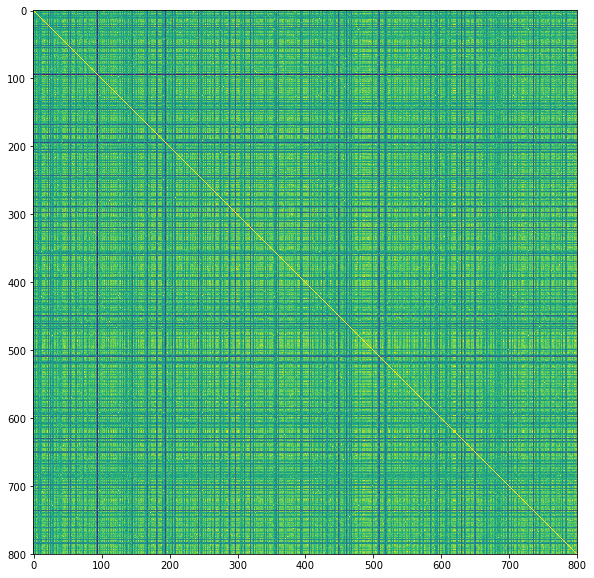

In [132]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(test)   #одинаковые значения обозначаются одинаковым цветом 
#диагональ одного цвета т.к. на диагонали слово пересекается само с собой и имеен одинаково большое значение метрики
plt.show()

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [136]:
from sklearn import svm
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

C_means = np.linspace(0.1, 12, num = 10) #значени для параметра С (величина штрафа)

for c in C_means:    
    svc = svm.SVC(C = c, kernel = 'precomputed')
    model = svc.fit(string_kernel(Xtrn,Xtrn), Ytrn) #обучаем модель на пользовательском ядре

    res_tr = model.predict(string_kernel(Xtrn, Xtrn)) #предсказание на выборке обучения
    res_test = model.predict(string_kernel(Xtest, Xtrn))#на тестовой выборке

    acc_tr = accuracy_score(res_tr,Ytrn)#accuracy для тренировочной выборки
    acc_test = accuracy_score(res_test,Ytest)#и тестовой

    print('C = ',c, '\nAccuracy на обучающей выборке = ', acc_tr, '\nAccuracy на тестовой выборке = ', acc_test)
#все это дело долго обучалось (примерно 25 минут) 
#результаты на более маленькой выборке (500 значений) имеют схожий результат 

C =  0.1 
Accuracy на обучающей выборке =  0.76625 
Accuracy на тестовой выборке =  0.73
C =  1.42222222222 
Accuracy на обучающей выборке =  0.74625 
Accuracy на тестовой выборке =  0.715
C =  2.74444444444 
Accuracy на обучающей выборке =  0.74875 
Accuracy на тестовой выборке =  0.71
C =  4.06666666667 
Accuracy на обучающей выборке =  0.7425 
Accuracy на тестовой выборке =  0.71
C =  5.38888888889 
Accuracy на обучающей выборке =  0.73375 
Accuracy на тестовой выборке =  0.69
C =  6.71111111111 
Accuracy на обучающей выборке =  0.7425 
Accuracy на тестовой выборке =  0.715
C =  8.03333333333 
Accuracy на обучающей выборке =  0.74125 
Accuracy на тестовой выборке =  0.705
C =  9.35555555556 
Accuracy на обучающей выборке =  0.74 
Accuracy на тестовой выборке =  0.705
C =  10.6777777778 
Accuracy на обучающей выборке =  0.73875 
Accuracy на тестовой выборке =  0.705
C =  12.0 
Accuracy на обучающей выборке =  0.73875 
Accuracy на тестовой выборке =  0.705
